week 1 | Groundwater

# Topic 1 : Introduction to the Groundwater course - The Limmat Vally Aquifer 

Dr. Xiang-Zhao Kong, Dr. Beatrice Marti, Louise Noel du Payrat

In [1]:
# Setting up the notebook
import sys
import os

from IPython.display import display

# Load local modules
sys.path.append('../../src')
from climate_utils import read_climate_data, plot_climate_data


# Introducing The Case Study

Most exercises as well as the final project in this course are based on case studies. Case studies are real-world scenarios that provide you with an opportunity to apply your knowledge and skills to solve complex groundwater problems. In this first year we choose the Limmat valley aquifer in Zurich, Switzerland. 

We will follow the actual steps a professional groundwater modeler might take to set up a numerical model to answer a specific question. In a first step, the modelers familiarize themselves with the Limmat valley aquifer and its hydrological and hydrogeological properties. 

# The Limmat Valley Aquifer
The Limmat valley aquifer is a well-studied groundwater reservoir beneath the city of Zurich, Switzerland. Doppler and colleagues write, that it was formed during the last ice age, when the Lindt glacier retreated. The Limmat valley aquifer has no direct hydraulic connection to lake Zurich in the east where it is bound by impermeable lake sediments and moraine material. The aquifer is further confined in the north and south by the side morains of the Lindth glacier. Lateral inflow of groundwater from the hills in the north and south is to be expected. The groundwater body is further in connection with the river Sihl in the east and thr river Limmat in the north. The hydraulic properties of the aquifer are higly heterogenic because of its complex geological history formed through various sedimentation and erosion events from the rivers Sihl and Limmat. [\[1, 2\]](#references)

In Figure 1 you see a prinscreen of the GIS-browser of the canton of Zurich. The cyanide blue area in the center of the map shows the Limmat valley aquifer. The darker the color, the larger the thickness of the aquifer.  

Please note that, at the time of writing (May 2025), the canton of Zurich is working on a new GIS-browser which will be availalbe under [https://geo.zh.ch/](https://geo.zh.ch/). Some of the links posted here may bring you to the new GIS-browser already or they may stop working. Please let us know if you find any broken links.

*Figure 1: Printscreen of the GIS-browser of the canton of Zurich at [https://maps.zh.ch/](https://maps.zh.ch/) [\[3\]](#references) displaying the cantonal groundwater map.* 
![GIS-browser](figures/GIS-browser_canton_Zurich.png)

<div style="padding: 1em; margin: 1em 0; border-left: 3px solid #8e44ad; background-color: #f5eef8;">
<strong>🤔 Think about it:</strong><br>
Take a few minutes to explore the available layers in the GIS-browser of the canton of Zurich. What do you think are the most important layers for groundwater modeling? Why?
</div>

# Climate
We get climate data from the Swiss Federal Office of Meteorology and Climatology (MeteoSwiss). The data is available for download at the following link: [MeteoSwiss](https://www.meteoswiss.admin.ch/services-and-publications/applications/measurement-values-and-measuring-networks.html#param=messnetz-klima&table=false&station=SMA&compare=y&chart=year) and made available in the data directory of the zurich case study repository. [\[4\]](#references) 
The closest station to the Limmat valley aquifer is the Fluntern station. The data is available for the years 1991-2020. Let's have a look at the data

In [2]:
data_path = os.path.abspath(
    os.path.join('..', '..', 'case_studies', 'case_study_zurich', 'data', 'climate'))
# Test if this is a valid path
if not os.path.exists(data_path):
    print(f"Path {data_path} does not exist.")

climate_norms = read_climate_data(data_path, station_string='Fluntern')

# Inspect the climate norms
display(climate_norms)

,shortname,longname,station,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,tnd00nm0,Monthly values Frost days (minimum lower than ...,Fluntern,18.9,16.4,8.9,2.2,0.0,0.0,0.0,0.0,0.0,1.0,7.0,17.5
1,tnd30xm0,Monthly values Hot days (maximum 30 degrees C ...,Fluntern,0.0,0.0,0.0,0.0,0.1,1.9,3.4,3.1,0.0,0.0,0.0,0.0
2,gre000m0,Monthly values Global radiation / watt/square ...,Fluntern,41.3,74.0,126.2,180.4,212.4,236.8,235.2,202.1,147.0,85.6,45.6,32.1
3,pva200m0,Monthly values Vapour pressure 2m / hectopasca...,Fluntern,5.6,5.6,6.6,7.8,10.8,13.6,15.1,15.5,12.9,10.4,7.5,6.0
4,rre150m0,Monthly values Precipitation total / millimete...,Fluntern,63.0,60.3,71.2,80.4,128.2,127.6,126.0,119.1,87.4,85.2,76.1,83.4
5,tre200m0,Monthly values Air temperature 2m / degree Cel...,Fluntern,0.9,1.8,5.8,9.6,13.6,17.1,19.0,18.6,14.4,10.0,4.9,1.7
6,tnd25xm0,Monthly values Summer days (maximum 25 degrees...,Fluntern,0.0,0.0,0.0,0.4,3.3,10.1,14.7,12.9,3.4,0.0,0.0,0.0
7,tre2dymx,Monthly values Mean maximum temperature 2m / d...,Fluntern,3.5,5.2,10.2,14.8,18.8,22.4,24.3,23.9,19.1,13.8,7.6,4.0
8,fkl010m0,Monthly values Wind speed scalar / meter/secon...,Fluntern,2.3,2.3,2.5,2.1,2.1,1.9,1.9,1.7,1.8,1.8,2.0,2.2
9,sremaxmv,Monthly values Relative sunshine duration / pe...,Fluntern,24.1,33.5,42.3,47.0,44.6,48.4,52.6,53.4,47.5,35.4,24.3,19.9


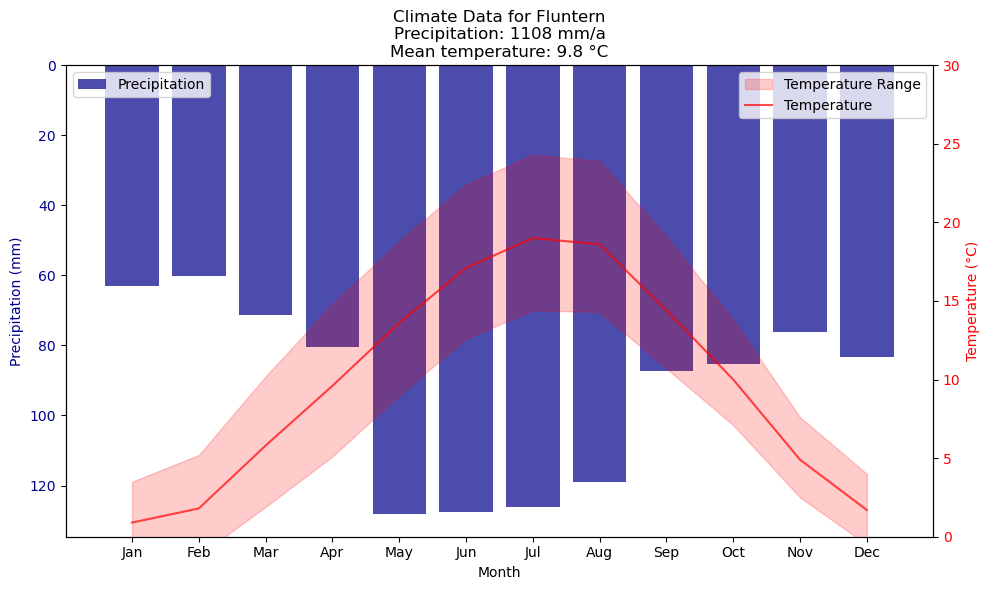

In [3]:
plt, fig = plot_climate_data(climate_norms)
plt.show()

<div style="padding: 1em; margin: 1em 0; border-left: 3px solid #8e44ad; background-color: #f5eef8;">
<strong>🤔 Think about it:</strong><br>
We are looking at the climate data mostly to get an idea about groundwater recharge. In an aquifer like the Limmat valley aquifer, which is located in a densely populated area, we have to consider that the recharge is not only influenced by the climate but also by human activities. What do you think are the most important human activities that influence groundwater recharge in this area?
</div>

## River Discharge & River Water Levels
The federal office for the environment (FOEN) is the first address for hydrological data in Switzerland. You will find all surface water monitoring sites under [map.geo.admin.ch](https://map.geo.admin.ch) under layer *Hydrological gauaging stations* [\[5\]](#references) (see Figure 2). 

*Figure 2: Hydrological gauging stations layer available at [map.geo.admin.ch](https://map.geo.admin.ch).*
![Hydrological gauging stations](figures/BAFU_HydrologicalGaugingStations.png)

When you zoom in to the Limmat valley aquifer (Figure 3), you will find the gauging stations of the rivers Sihl and Limmat. A next gauging station on the river Limmat is located at the city of Baden, downstream of a run-by-the-river hydropower plant, and therefore not relevant for our study. The gauging station on the river Sihl is located at the city of Zurich, upstream of the confluence with the river Limmat. The gauging station on the river Limmat is located at the city of Zurich, downstream of the confluence with the river Sihl. 

*Figure 3: Locations of hydrological gauging stations near the Limmat valley aquifer.*
![Close up of the gauging stations](figures/BAFU_HydrologicalGaugingStations_closeup.png)

A click on the gauaging station will bring you directly to the station site made available by the federal office for the environment (FOEN). The gauging station on the river Sihl is called [*Sihl - Zürich, Sihlhölzli*](https://www.hydrodaten.admin.ch/de/seen-und-fluesse/stationen-und-daten/2176) and has ID 2176 and the gauging station on the river Limmat is called [*Limmat - Zürich, Unterhard*](https://www.hydrodaten.admin.ch/de/seen-und-fluesse/stationen-und-daten/2099) and has ID 2099. The IDs are unique numeric station identifiers and typically required to retrieve data from data repositories or APIs. 

<div style="padding: 1em; margin: 1em 0; border-left: 3px solid #8e44ad; background-color: #f5eef8;">
<strong>🤔 Think about it:</strong><br>
For surface water balancing, discharge is the important variable. However, when it comes to flooding or river-aquifer interaction, the water level is the more important variable. Why do you think that is? 
</div>

From the station sites, we see current water levels, typically over the past 7 days but no water level dynamics. We have to requet the data from FOEN.   
# TODO: Requested water level data from FOEN, integrate once available.

# Note: sections below may be removed in the future

To get a first idea about the river discharge, we look at the yearbook data from 2020 which can be found for downloading on the station site of every site and which is available in the data folder of the Zurich case study. More recent yearbook data may be available. Feel free to check for it but be aware that provisory yearbook data is not yet fully validated. 

From the yearbook sheets, we learn that the long-term average discharges of the rivers [Limmat](../../case_studies/case_study_zurich/data/rivers/2099Q_20.pdf) and [Sihl](../../case_studies/case_study_zurich/data/rivers/2176Q_20.pdf) are 95 m^3/s and 7 m3/s. 

No additional river gauging stations are maintained by the cantonal office for waste, water, energy and air (Amt für Abfall, Wasser, Energie und Luft (AWEL)) [\[6\]](#references). 

<div style="padding: 1em; margin: 1em 0; border-left: 3px solid #2980b9; background-color: #ebf5fb;">
<strong>💡 For curious minds:</strong><br>
Please take some time to familiarize yourself with the yearbook sheets.<br>
Did you notice the different shapes of the flow duration curves? What does this tell you about the hydrological regime of the rivers?<br>
Can you find the highest ever measured discharge in both rivers? Which one might be the more difficult to manage?
</div>


## Monitoring the Limmat Valley Aquifer
To get a first idea about the groundwater levels in the Limmat valley aquifer, we will have a look at the groundwater map.

Several authorities do groundwater monitoring in the Limmat valley aquifer. We will start with the federal office for the environment (FOEN) which maintains a network of groundwater observation wells. You find an overview over the available groundwater monitoring sites at [https://map.geo.admin.ch/](https://map.geo.admin.ch/) in layer *Groundwater level/spring discharge* [\[7\]](#references). One monitoring well maintained by FOEN is located in the Limmat valley aquifer but far downstream of our area of interest in the city center. Further, this well is a drinking water production well and can therefore not be used as an outflow boundary.  

Few groundwater observation wells are operated by the cantonal office of the environment ([AWEL](https://www.zh.ch/de/umwelt-tiere/wasser-gewaesser/messdaten/grundwasserstaende.html)) (Figure 4). 

*Figure 4: Monitoring wells in the Limmat valley aquifer. Yearbook sheets for each site can be accessed through the popup window from each site [\[8\]](#references).*
![Monitoring wells](figures/GWmonitoring_locations_AWEL.png)



We will look at the groundwater level data in a next step. For now, we're interested in a general overview of the average groundwater flow field in the Limmat valley aquifer. This information is displayed in the groundwater map of the canton of Zurich. The map is available at the GIS-browser of the canton of Zurich ([https://maps.zh.ch/](https://maps.zh.ch/)) (Figure 5) [\[5\]](#references).

*Figure 5: Interpolated groundwater levels in the Limmat valley aquifer. The map is available at the GIS-Browser of the Canton of Zurich ([https://maps.zh.ch/](https://maps.zh.ch/)). 
![Mittelwasserstand](figures/GWMittelwasserstand.png)*

From the isolines of groundwater levels, we can see that the groundwater flow direction is from the south-east to the north-west. The rivers Limmat and Sihl infiltrate into the aquifer. We further have to account for lateral inflow from the hills in the north and south. 

In Figure 6, we see that the aquifer is heavily influenced by pumping and infiltration [\[3\]](#references), especially for heating and cooling. 

*Figure 6: Pumping and infiltration wells in the Limmat valley aquifer.*
![Pumping and infiltration wells](figures/GWPumping.png)

By clicking on the wells in the GIS-Browser, you can get the concessioned pumping rates for the production wells. The pumping rates are typically given in l/min. The concessioned pumping rates are the maximum pumping rates that can be extracted from the well. The actual pumping rates may be lower but not readily available to the public.  



<div style="padding: 1em; margin: 1em 0; border-left: 3px solid #8e44ad; background-color: #f5eef8;">
<strong>🤔 Think about it:</strong><br>
What are the major hydrological processes in the Limmat valley aquifer?<br>
Where would you set the boundaries of the Limmat valley aquifer?
</div>

## References
[\[1\]](#the-limmat-valley-aquifer) Hug J., and Beilick, A. (1934): Die Grundwasserverhältnisse des Kantons Zürich. In: Beiträge zur Geologie der Schweiz - Geotechnische Serie - Hydrologie. German. Available online here: [https://scnat.ch/de/uuid/i/0bd7aa3b-0bd7-5d54-9e2f-597a42dada50-Die_Grundwasserverh%C3%A4ltnisse_des_Kantons_Z%C3%BCrich](https://scnat.ch/de/uuid/i/0bd7aa3b-0bd7-5d54-9e2f-597a42dada50-Die_Grundwasserverh%C3%A4ltnisse_des_Kantons_Z%C3%BCrich) (accessed 2025-05-01)   
[\[2\]](#the-limmat-valley-aquifer) Doppler, T., Hendricks Franssen, H.-J., Kaiser H.-P., Kuhlman U., Stauffer, F. (2007): Field evidence of a dynamic leakage coefficient for modelling river–aquifer interactions. Journal of Hydrology, Volume 347, Issues 1–2, DOI: [https://doi.org/10.1016/j.jhydrol.2007.09.017](https://doi.org/10.1016/j.jhydrol.2007.09.017).  
[\[3\]](#the-limmat-valley-aquifer) GIS-browser of the canton of Zurich: [https://maps.zh.ch/](https://maps.zh.ch/) (accessed 2025-05-01)  
[\[4\]](#climate) MeteoSwiss: [https://www.meteoswiss.admin.ch/services-and-publications/applications/measurement-values-and-measuring-networks.html#param=messnetz-klima&table=false&station=SMA&compare=y&chart=year](https://www.meteoswiss.admin.ch/services-and-publications/applications/measurement-values-and-measuring-networks.html#param=messnetz-klima&table=false&station=SMA&compare=y&chart=year) (accessed 2025-05-01)  
[\[5\]](#river-discharge) Locations of hydrological gauging stations maintained by the Federal Office for the Environment (FOEN): [https://map.geo.admin.ch](https://map.geo.admin.ch/#/map?lang=en&center=2660000,1190000&z=1&topic=ech&layers=ch.bafu.hydrologie-hydromessstationen&bgLayer=ch.swisstopo.pixelkarte-farbe) (accessed 2025-05-01)
[\[6\]](#river-discharge) Locations of hydrological gauging stations maintained by the cantonal office for waste, water, energy, and air (AWEL): [https://www.zh.ch/de/umwelt-tiere/wasser-gewaesser/messdaten/abfluss-wasserstand.html](https://www.zh.ch/de/umwelt-tiere/wasser-gewaesser/messdaten/abfluss-wasserstand.html) (accessed 2025-05-01)  
[\[7\]](#monitoring-the-limmat-valley-aquifer) Locations of groundwater monitoring wells maintained by Federal Office for the Environment (FOEN): [https://map.geo.admin.ch](https://map.geo.admin.ch/#/map?lang=en&center=2660000,1190000&z=1&topic=ech&layers=ch.bafu.hydroweb-messstationen_grundwasser&bgLayer=ch.swisstopo.pixelkarte-farbe) (accessed 2025-05-01)  
[\[8\]](#monitoring-the-limmat-valley-aquifer) Cantonal office of the environment (AWEL): [https://www.zh.ch/de/umwelt-tiere/wasser-gewaesser/messdaten/grundwasserstaende.html](https://www.zh.ch/de/umwelt-tiere/wasser-gewaesser/messdaten/grundwasserstaende.html) (accessed 2025-05-01)
